In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

from skimage.metrics import structural_similarity as ssim

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import img_to_array

from keras import layers

2023-04-25 14:12:16.114524: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lcadame/mambaforge/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-25 14:12:16.114539: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [49]:
def mse(img,target):
    mse=np.mean((img-target)**2)
    return mse

In [55]:
def psnr(img,target):
    psnr=10*np.log10(1/mse(img,target))
    return psnr

In [56]:
model1_path = 'models/2404_600x_200i.h5'
model2_path = 'models/2404_600x_200i_2.h5'

model1=tf.keras.models.load_model(model1_path)
model2=tf.keras.models.load_model(model2_path)

SIZE=600

test_hr=[]
path='test_hr/'
data=np.sort(os.listdir(path))
for img_path in tqdm(data):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    test_hr.append(img)
test_hr=np.array(test_hr)
    
test_lr=[]
path='test_lr/'
data=np.sort(os.listdir(path))
for img_path in tqdm(data):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    test_lr.append(img)
test_lr=np.array(test_lr)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 592.34it/s]


In [57]:
def evaluate_model(test_hr,test_lr,model1,model2):
    
    i=np.random.randint(0,len(test_hr))

    img,target=test_lr[i],test_hr[i]
    output1=model1.predict(img.reshape(1,SIZE,SIZE,3))[0]
    output2=model2.predict(output1.reshape(1,SIZE,SIZE,3))[0]

    fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,15))
    ax1.imshow(img)
    ax1.set_title('low resolution image')
    ax2.imshow(output1)
    ax2.set_title('first model output')
    ax3.imshow(output2)
    ax3.set_title('second model output')
    ax4.imshow(target)
    ax4.set_title('high resolution image')

    print('')
    print('SSIM between LR image and HR image: {}'.format(ssim(img,target,multichannel=True)))
    print('SSIM between first model output and HR image: {}'.format(ssim(output1,target,multichannel=True)))
    print('SSIM between second model output and HR image: {}'.format(ssim(output2,target,multichannel=True)))
    print('')
    print('MSE between LR image and HR image: {}'.format(mse(img,target)))
    print('MSE between first model output and HR image: {}'.format(mse(output1,target)))
    print('MSE between second model output and HR image: {}'.format(mse(output2,target)))
    print('')
    print('PSNR between LR image and HR image: {}'.format(psnr(img,target)))
    print('PSNR between first model output and HR image: {}'.format(psnr(output1,target)))
    print('PSNR between second model output and HR image: {}'.format(psnr(output2,target)))
    
    return img,output1,output2,target


SSIM between LR image and HR image: 0.7156550288200378
SSIM between first model output and HR image: 0.7627179622650146
SSIM between second model output and HR image: 0.8017173409461975

MSE between LR image and HR image: 0.00709632458165288
MSE between first model output and HR image: 0.005047962535172701
MSE between second model output and HR image: 0.004086603876203299

PSNR between LR image and HR image: 21.48966528351511
PSNR between first model output and HR image: 22.968838769866124
PSNR between second model output and HR image: 23.88637457398911


/tmp/ipykernel_21683/1161334109.py:20: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print('SSIM between LR image and HR image: {}'.format(ssim(img,target,multichannel=True)))
/tmp/ipykernel_21683/1161334109.py:21: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print('SSIM between first model output and HR image: {}'.format(ssim(output1,target,multichannel=True)))
/tmp/ipykernel_21683/1161334109.py:22: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print('SSIM between second model output and HR image: {}'.format(ssim(output2,target,multichannel=True)))


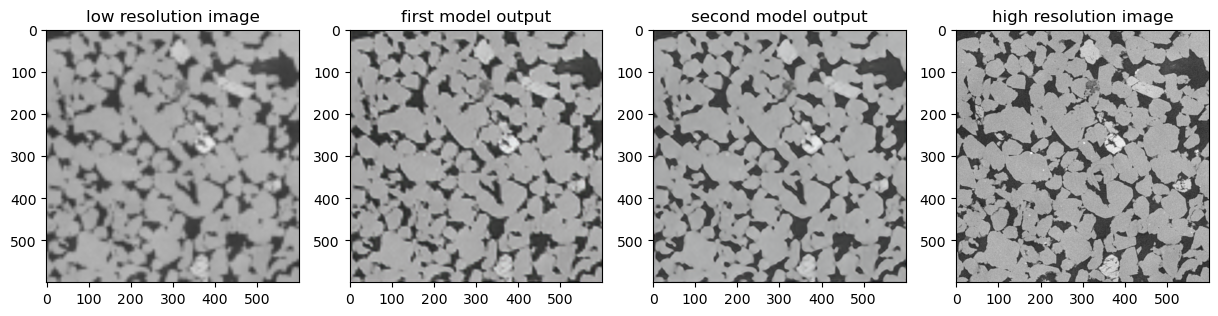

In [60]:
img,output1,output2,target=evaluate_model(test_hr,test_lr,model1,model2)